In [1]:
import matplotlib.pyplot as plt
from pyniva import PUB_META, PUB_TSB, Vessel, token2header

plt.style.use("ggplot")

# Data access using pyniva

*Notebook contributed by Zofia Rudjord*

This is an example demonstrating how to get data from **nivacloud** using **pyniva** and plot them. The pyniva package is already installed on the JupyterHub and a common access token for all users is stored on the `shared` drive. Eventually, we may switch to personal/individual access tokens, but for now all users of the JupyterHub can use the same shared token, as illustrated in the code below.

Here is how you start:

In [2]:
path_to_token = "/home/jovyan/shared/01_datasets/tokens/niva-service-account.json"
HEADER = token2header(path_to_token)

To check which Vessels have associated data:

In [3]:
boat = [v for v in Vessel.list(PUB_META, header=HEADER)]
print(*[b.path for b in boat], sep="\n")

RA
Survey_2019_test/Waveglider_1
Survey_2019_04/SeaGlider_1
Survey_2019_04/Waveglider_1
Survey_2018_03/SeaGlider_1
Survey_2019_04/SB_Echo
NO
Survey_2019_04_test/SeaGlider_1
Survey_2019_04_test/SB_Echo
Survey_2018_03/SB_Echo
SYNTH_FA
FA
Survey_2018_03/Waveglider_1
NB
TF


To see which data exists for Color Fantasy 

In [4]:
platform_code = "FA"
first_n_measurements = 10  # = -1 will list all measurments
FA = [v for v in boat if v.path == platform_code][0]
measurements = FA.get_all_tseries(PUB_META, header=HEADER)
print(*[m.path for m in measurements][:first_n_measurements], sep="\n")

FA/GYRO/HEADING
FA/ferrybox/INLET/OXYGEN/TEMPERATURE/ARGO_SPIKE_TEST
FA/ferrybox/INLET/OXYGEN/TEMPERATURE/LOCAL_RANGE_TEST
FA/ferrybox/INLET/OXYGEN/TEMPERATURE/GLOBAL_RANGE_TEST
FA/ferrybox/INLET/OXYGEN/TEMPERATURE/FROZEN_TEST
FA/ferrybox/INLET/OXYGEN/TEMPERATURE
FA/ferrybox/SYSTEM/INVERTER/OUTPUTS
FA/ferrybox/C3/CDOM_FLUORESCENCE/RAW
FA/ferrybox/PAH_FLUORESCENCE/RAW
FA/ferrybox/SYSTEM/PRESSURE/P1


To get raw chlorophyll data for May-Jul 2019 ( note noqc = True setting in order to get all data without quality control)

In [5]:
start_time = "2019-05-01T00:00:00"
end_time = "2019-07-31T00:00:00"
path = platform_code + "/ferrybox/CHLA_FLUORESCENCE/ADJUSTED"
for m in measurements:
    if m.path == path:
        data = m.get_tseries(
            PUB_TSB,
            header=HEADER,
            noqc=True,
            dt=0,
            start_time=start_time,
            end_time=end_time,
        )

print(data)

                     chla_fluorescence
time                                  
2019-05-01 00:00:53             29.055
2019-05-01 00:01:54             30.120
2019-05-01 00:02:54             31.275
2019-05-01 00:03:54             31.545
2019-05-01 00:04:54             29.730
...                                ...
2019-07-30 23:55:23             11.565
2019-07-30 23:56:23             11.550
2019-07-30 23:57:23             11.565
2019-07-30 23:58:23             11.565
2019-07-30 23:59:24             11.580

[120727 rows x 1 columns]


To plot the data

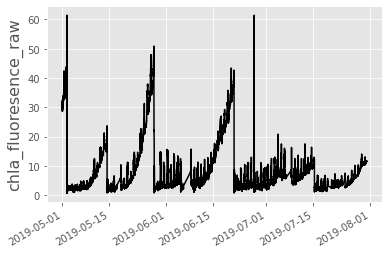

In [6]:
plt.plot(data, color="k", label="raw data")
plt.gcf().autofmt_xdate()
plt.ylabel("chla_fluoresence_raw", fontsize=16)
plt.show()